## **Human Activity Recognition with RNN-LSTM Models**

**Goal**: The goal of this project is to develop a deep learning model (LSTM) that can accurately recognize and classify human physical activities such as walking, sitting, standing, and lying using time-series sensor data from smartphones. The system aims to provide insights for health monitoring, wellness management, and preventive care.

In [37]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam, Adamax
import seaborn as sns
from keras.utils import to_categorical
import matplotlib.pyplot as plt



In [2]:
#load train data
train = pd.read_csv('train.csv')
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
#load test data
test = pd.read_csv('test.csv')
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [4]:
#dataset info
train.info

<bound method DataFrame.info of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245     

In [5]:
#statistical distribution for the train data
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
#statistical distribution for the test data
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


**EDA**

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


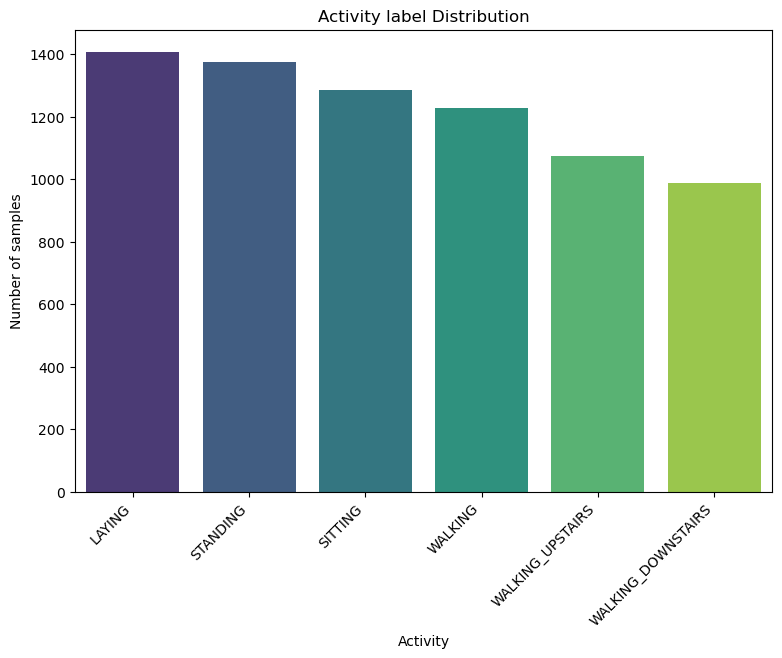

In [7]:
#count samples of activities
activity_counts = train.iloc[:,-1].value_counts().sort_values(ascending=False)
print(activity_counts)

#plot
plt.figure(figsize=(9,6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='viridis')
plt.title("Activity label Distribution")
plt.xlabel("Activity")
plt.ylabel("Number of samples")
plt.xticks(rotation=45, ha='right')
plt.show()

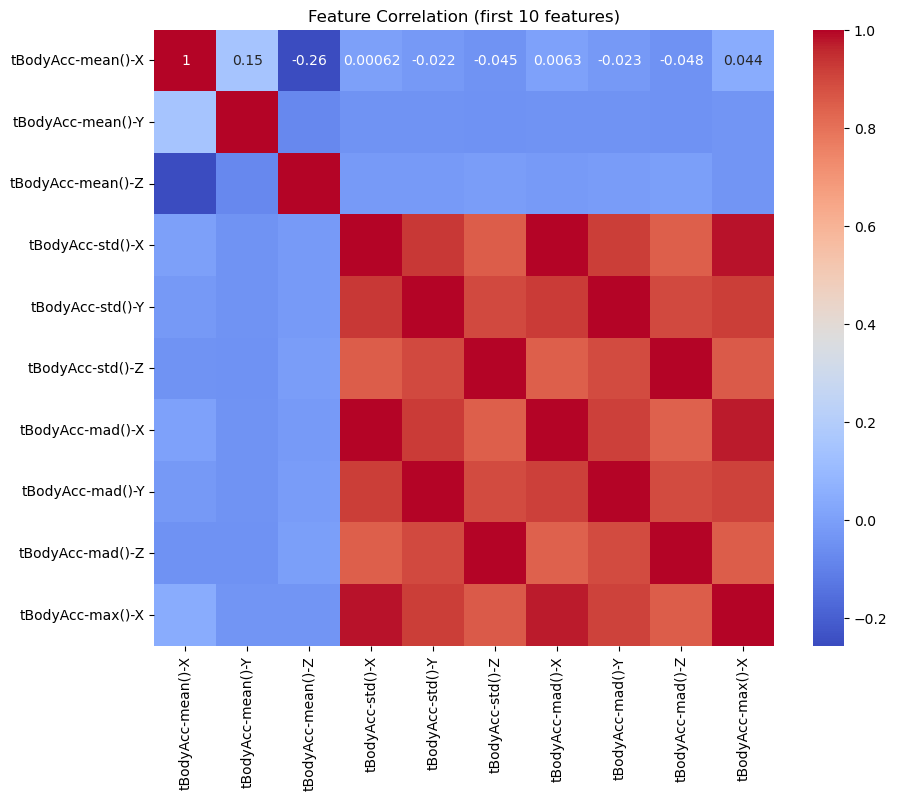

In [8]:
#feature correlation
corr = train.iloc[:,:10].corr()

#plot
plt.figure(figsize=(10,8))
plt.title('Feature Correlation (first 10 features)')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [9]:
columns_to_plot = train.columns[:10]
columns_to_plot

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X'],
      dtype='object')

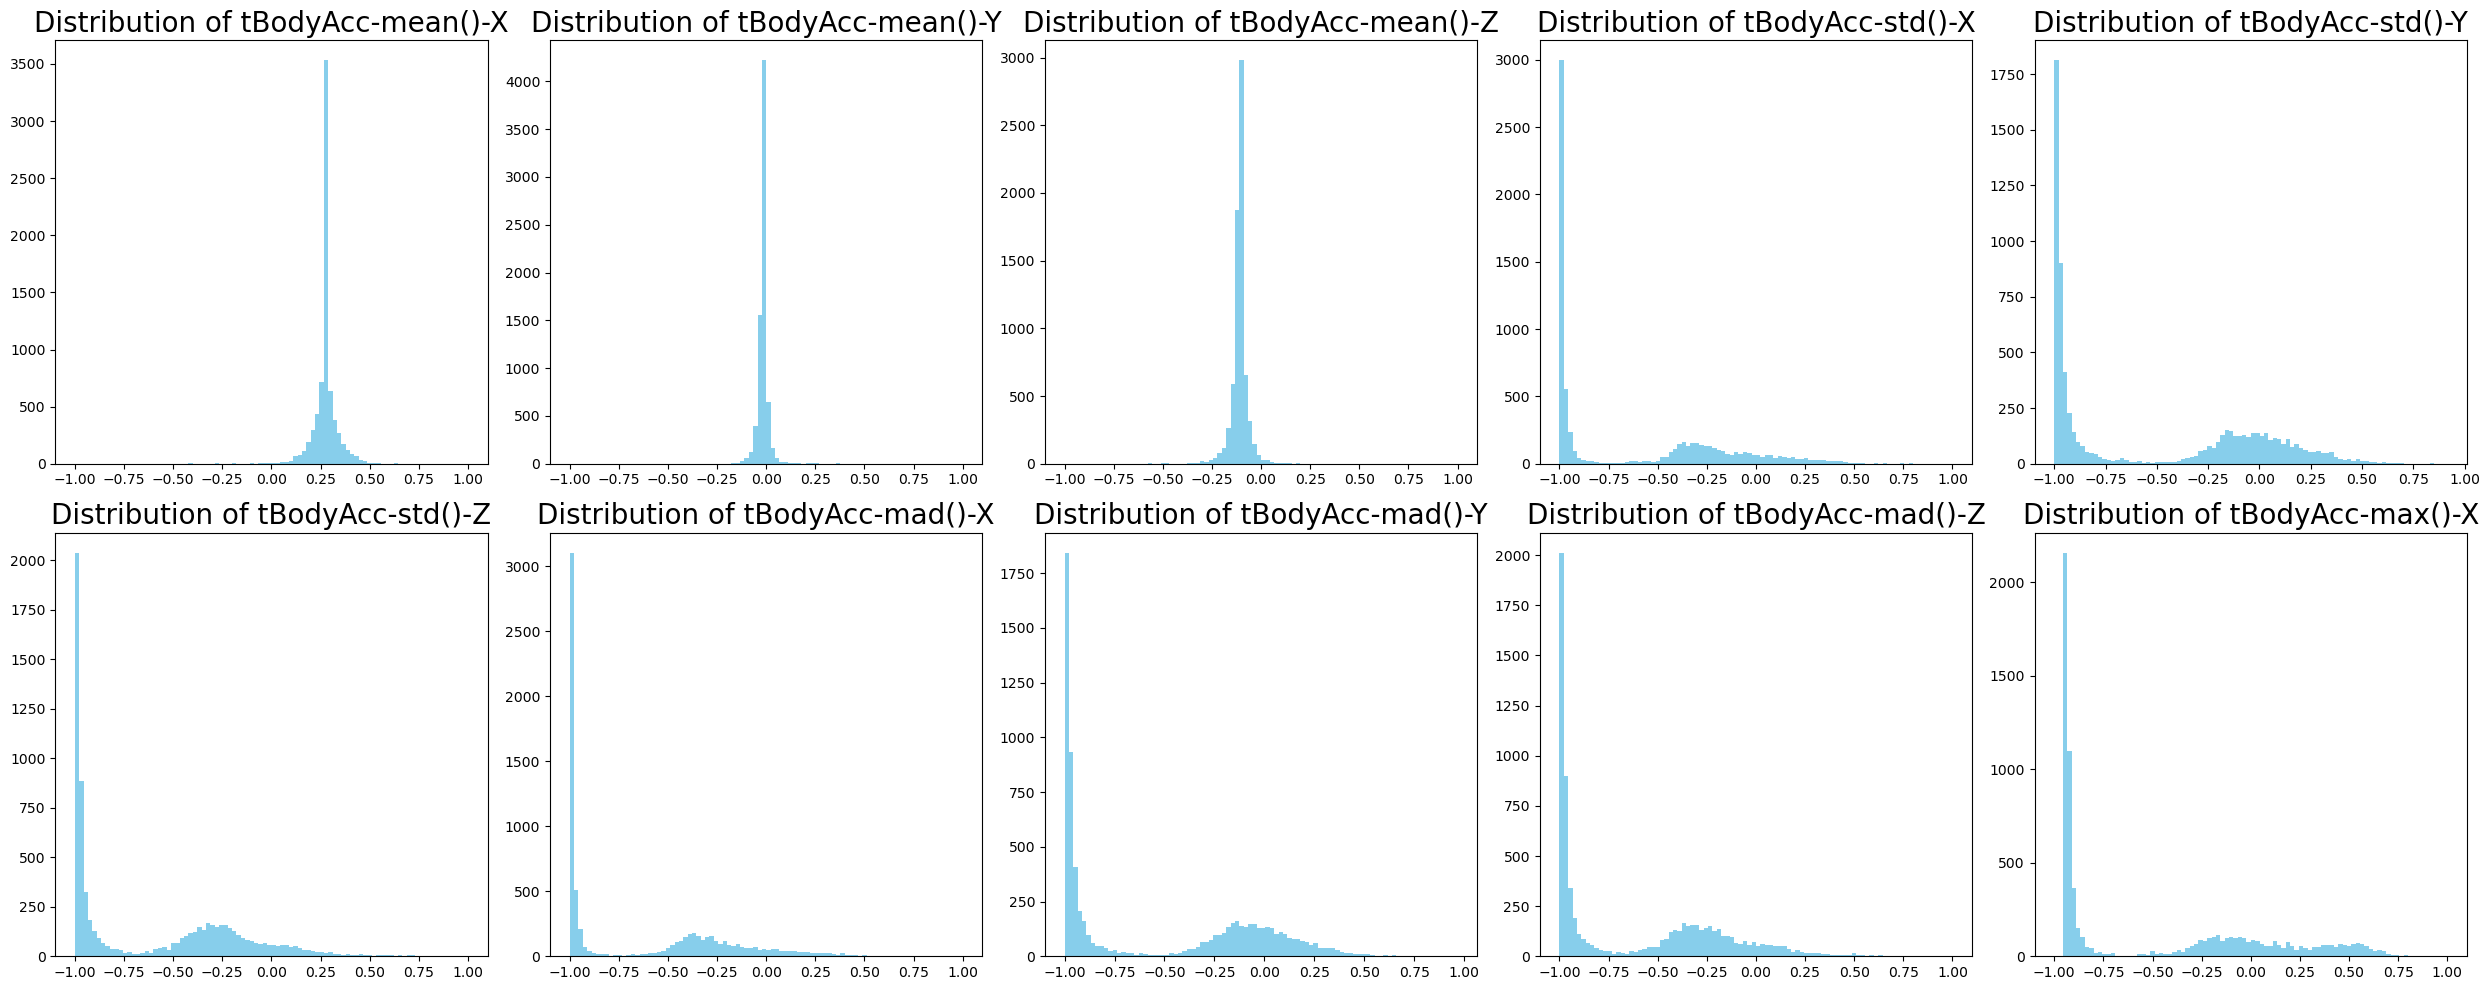

In [10]:
n_cols = 5
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(5*n_cols,5* n_rows))

for i, col in enumerate(columns_to_plot):
    plt.subplot(n_rows,n_cols, i+1) 
    plt.hist(train[col], bins=90, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=20)
    plt.tight_layout()


plt.show()  

**Data Preprocessing**

In [11]:
#checking for nulls in the train data
train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [12]:
#checking for nulls on the test data
test.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [13]:
#check for the percenages of missing values in the data
summary = pd.DataFrame({'missing_count': train.isna().sum(),
                        'missing_percent': train.isna().mean()*100}).sort_values(by='missing_percent', ascending=False)
summary

,missing_count,missing_percent
tBodyAcc-mean()-X,0,0.0
fBodyAccJerk-kurtosis()-Y,0,0.0
fBodyAccJerk-meanFreq()-X,0,0.0
fBodyAccJerk-meanFreq()-Y,0,0.0
fBodyAccJerk-meanFreq()-Z,0,0.0
...,...,...
tBodyGyroJerk-iqr()-Z,0,0.0
tBodyGyroJerk-iqr()-Y,0,0.0
tBodyGyroJerk-iqr()-X,0,0.0
tBodyGyroJerk-energy()-Z,0,0.0


From the above, we can see that there are no null values on the data.

In [14]:
#correlation matrix
corr_matrix = train.iloc[:,:-1].corr().abs() #exclude the target variable

#upper triangle of the matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#find columns with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column]> 0.95)]
print(f"Columns dropped due to high correlation: {len(to_drop)}")

Columns dropped due to high correlation: 308


In [15]:
#test data
corr_matrix1 = test.iloc[:,:-1].corr().abs()
#upper triangle of the matrix
upper = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(bool))

#find columns with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column]> 0.95)]
print(f"Columns dropped due to high correlation: {len(to_drop)}")

Columns dropped due to high correlation: 309


In [16]:
#cleaned data
train_reduced = train.drop(columns = to_drop)


In [17]:
test_reduced = test.drop(columns=to_drop)

In [18]:
#train dataset
train_X = train_reduced.drop('Activity', axis=1) #keep features
train_y = train_reduced['Activity'].values

In [19]:
#test data
test_X = test_reduced.drop('Activity', axis=1)
test_y = test_reduced['Activity'].values

In [20]:
#converted the categorical variable to numeric
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.fit_transform(test_y)

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)



In [32]:
for i, class_name in enumerate(le.classes_):
    print(f"{i} -> {class_name}")


0 -> LAYING
1 -> SITTING
2 -> STANDING
3 -> WALKING
4 -> WALKING_DOWNSTAIRS
5 -> WALKING_UPSTAIRS


In [21]:
#scaled the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.fit_transform(test_X)


In [ ]:
#reshape
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # (samples, timesteps=1, features)
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


**Modelling**

LSTM

In [23]:
#model definition
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(train_y.shape[1], activation='softmax'))

#compile
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            195584    
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 245,382
Trainable params: 245,382
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, 
                    train_y,
                    epochs=15,
                    validation_split=0.2,
                    shuffle=True)

Epoch 1/15
184/184 [==============================] - 12s 23ms/step - loss: 1.3263 - accuracy: 0.4768 - val_loss: 0.8427 - val_accuracy: 0.7682
Epoch 2/15
184/184 [==============================] - 2s 11ms/step - loss: 0.7510 - accuracy: 0.6951 - val_loss: 0.5409 - val_accuracy: 0.8443
Epoch 3/15
184/184 [==============================] - 2s 12ms/step - loss: 0.5366 - accuracy: 0.8009 - val_loss: 0.3583 - val_accuracy: 0.9055
Epoch 4/15
184/184 [==============================] - 3s 15ms/step - loss: 0.4094 - accuracy: 0.8582 - val_loss: 0.2828 - val_accuracy: 0.9116
Epoch 5/15
184/184 [==============================] - 2s 13ms/step - loss: 0.3346 - accuracy: 0.8783 - val_loss: 0.2785 - val_accuracy: 0.9075
Epoch 6/15
184/184 [==============================] - 2s 11ms/step - loss: 0.2820 - accuracy: 0.9000 - val_loss: 0.2142 - val_accuracy: 0.9137
Epoch 7/15
184/184 [==============================] - 2s 12ms/step - loss: 0.2475 - accuracy: 0.9051 - val_loss: 0.2008 - val_accuracy: 0.932

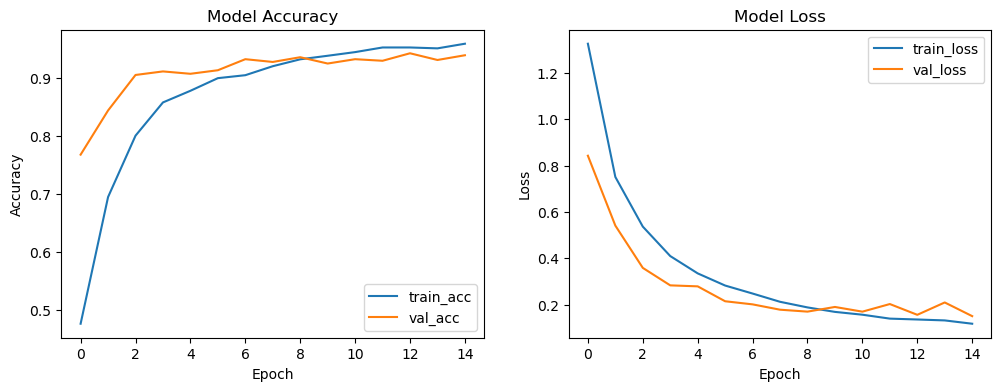

In [25]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:

# predicted probabilities from the model
pred_prob = model.predict(X_test)

# Convert probabilities to predicted class indices
pred_y = np.argmax(pred_prob, axis=1)

# Convert one-hot encoded test labels back to class indices
test_y_labels = np.argmax(test_y, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(test_y_labels, pred_y)
print(f"Accuracy: {accuracy:.2f}")

report  = classification_report(test_y_labels, pred_y)
print(report)


93/93 [==============================] - 2s 7ms/step
Accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.80      0.97      0.88       491
           2       0.98      0.77      0.86       532
           3       0.99      0.75      0.85       496
           4       0.66      1.00      0.80       420
           5       0.97      0.80      0.88       471

    accuracy                           0.88      2947
   macro avg       0.90      0.88      0.88      2947
weighted avg       0.91      0.88      0.88      2947



Insights
- Classes 0 and 1 are very well recognized.
- Classes 2, 3, 4, 5 have some confusion, especially class 4, which the model over-predicts.
- Overall, the LSTM captures temporal patterns well for human activity recognition.
- Practical implication: it can reliably detect most activities but may mislabel some similar activities.

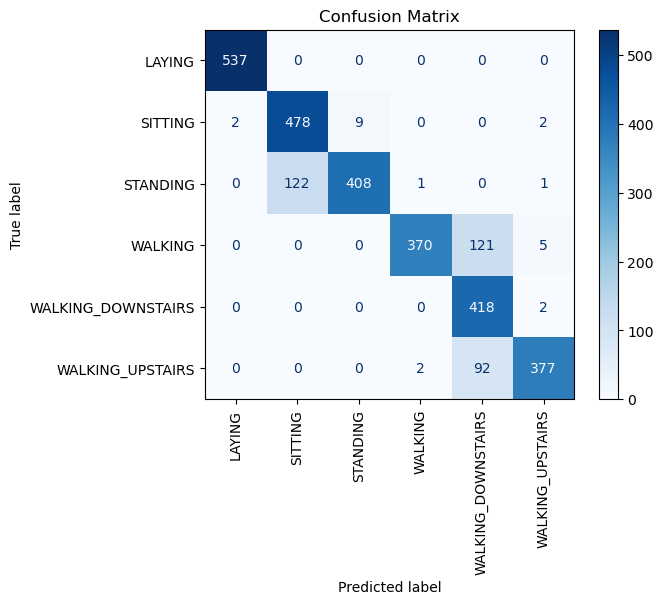

In [34]:

# Compute confusion matrix
cm = confusion_matrix(test_y_labels, pred_y)

# activity names
activity_names = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=activity_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()


Observations
- STANDING predicted as SITTING (122 times)
- WALKING predicted as WALKING_DOWNSTAIRS (121 times)
- WALKING_UPSTAIRS predicted as WALKING_DOWNSTAIRS (92 times)

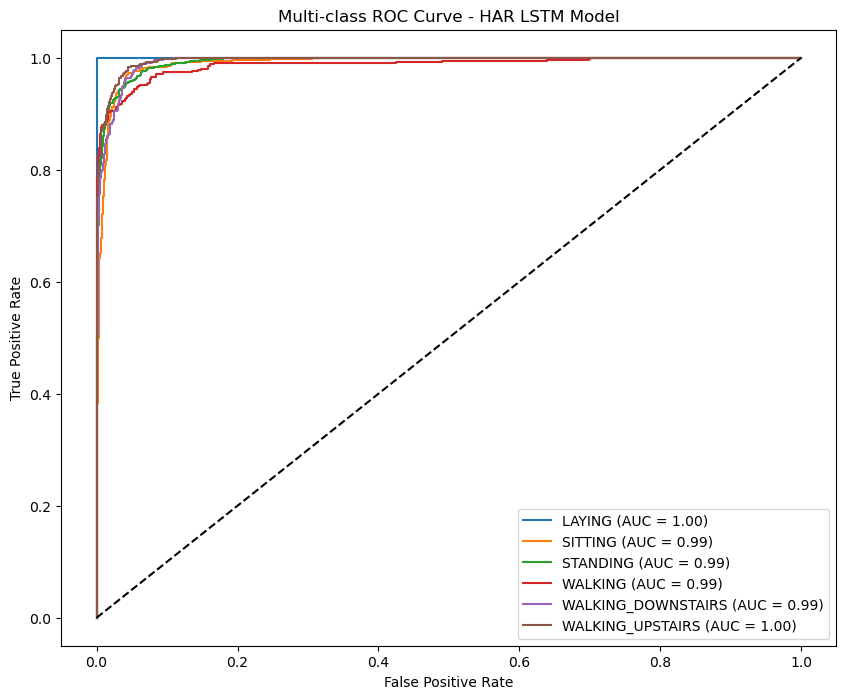

In [ ]:
# Plot ROC for each class
plt.figure(figsize=(10, 8))
for i, activity in enumerate(activity_names):
    fpr, tpr, _ = roc_curve(test_y[:, i], pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{activity} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve - HAR LSTM Model')
plt.legend(loc='lower right')
plt.show()


Observation
- AUC for all activities: 0.99 – 1.00

**Insights**

**1. Model performance**
- Accuracy: 0.88 on test data.
- Precision, Recall, F1-Score: LAYING: Perfect (precision, recall, F1 = 1.00), Other activities range from ~0.66 to 0.99 in precision and recall.
- Observation: Some misclassifications exist, mainly between SITTING and STANDING or WALKING variants (up/downstairs), likely due to similar sensor patterns.

**2. Confusion matrix**
- Due to misclassifications of some activities it shows the model’s limitations in distinguishing activities with similar motion patterns.

**3. ROC-AUC**
- The model almost perfectly separates each activity from the rest.
- Even if some misclassifications exist, the model is confident in its predictions.

**4. Key Takeaways**
- LSTM effectively captures sequential patterns in wearable sensor data.
- Most misclassifications occur between similar postures or movements.

**5. Health implications**

Can be used in fitness trackers, physical therapy monitoring, or workplace wellness to:
- Track physical activity and sedentary behavior.
- Give real-time alerts if abnormal inactivity is detected.
- Provide insights for personalized fitness or rehabilitation programs.
